In [57]:
import pandas as pd
# %load_ext autoreload
# %autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
import torch

from config.model_config import ModelConfig
from config.experiment_config import ExperimentConfig, AvailableDatasets
from vol_predict.features.preprocessor import OneToOnePreprocessor
from vol_predict.loss.loss import Loss

from vol_predict.models.dl.vi_predictor import (
    ViPredictor as Model,
)
from vol_predict.models.baselines.naive_predictor import NaivePredictor as Baseline

from run import run_backtest, initialize_sequential_runner

In [59]:
config = ExperimentConfig()
config.DATASET = AvailableDatasets.BITCOIN

model_params = ModelConfig()
baseline_params = ModelConfig()

model_params.n_features = 1200
model_params.n_unique_features = 10

# Handles the features
feature_processor = OneToOnePreprocessor()

runner = initialize_sequential_runner(
    model_config=model_params,
    preprocessor=feature_processor,
    experiment_config=config,
)

Available data from 2018-06-04 23:00:00 to 2018-09-30 21:00:00


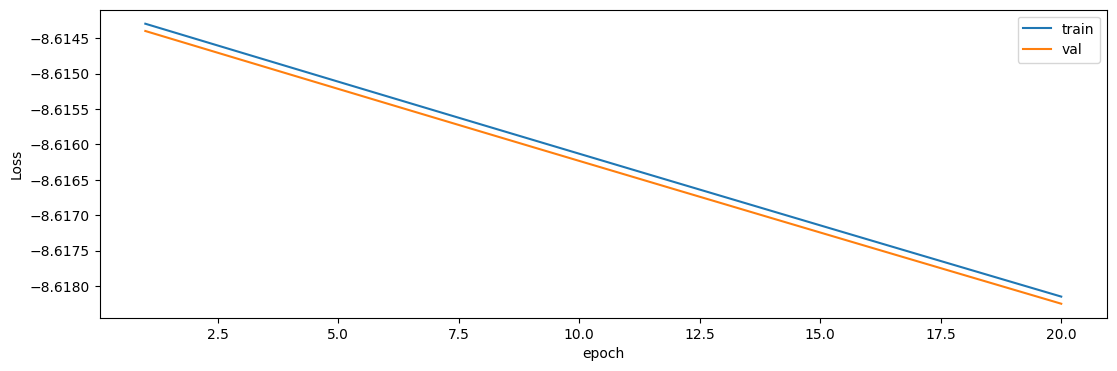

In [60]:
runner.model_config.lr = 1e-2
runner.model_config.n_epochs = 20
runner.model_config.hidden_size = 64
runner.model_config.n_layers = 3
runner.model_config.batch_size = 16
runner.model_config.optimizer = torch.optim.Adam
runner.model_config.loss = Loss.NLL
runner.model_config.dropout = 0.20

result = run_backtest(
    model_cls=Model,
    baseline_cls=Baseline,
    runner=runner,
)

In [65]:
result

AttributeError: module 'numpy._core._dtype' has no attribute '_name_get'

AttributeError: module 'numpy._core._dtype' has no attribute '_name_get'

In [64]:
result

AttributeError: module 'numpy._core._dtype' has no attribute '_name_get'

AttributeError: module 'numpy._core._dtype' has no attribute '_name_get'

In [63]:
from sklearn.metrics import root_mean_squared_error

rmse = []
for date, row in result.iterrows():
    rmse.append(
        [
            date,
            root_mean_squared_error(row.true_vols, row.model_preds),
            root_mean_squared_error(row.true_vols, row.baseline_preds),
        ]
    )

rmse = pd.DataFrame(rmse, columns=["date", "model", "baseline"]).set_index("date")

AttributeError: module 'numpy._core.multiarray' has no attribute 'copyto'

In [110]:
rmse.mean(axis=0)

model       0.000147
baseline    0.000154
dtype: float64

In [111]:
rmse.std(axis=0)

model       0.000181
baseline    0.000180
dtype: float64

In [66]:
result.to_csv(f"Vi_Predictor_{runner.model_config.n_epochs}.csv")

AttributeError: module 'numpy._core.multiarray' has no attribute 'ndarray'